

```
# This is formatted as code
```

# Create an arraw from initial text data, showing the relative weight of each word using TF-IDF metric


In [76]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import files  # Import for Google Colab
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download NLTK data (run this line once)
#import nltk
#nltk.download('punkt')

# Load your CSV file
df = pd.read_csv("Concat_Text.csv", sep=';')  # Replace 'your_file.csv' with your actual file name
text_column = df['Concat_Text']

# Stemming function using Porter Stemmer
def stem_text(text):
    words = word_tokenize(text)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words if not word.isdigit()]  # Exclude numeric tokens
    return ' '.join(stemmed_words)

# Apply stemming to each text entry
text_column_stemmed = text_column.apply(stem_text)

# Set the maximum number of features (words) to consider
max_features = 200

# Create a TF-IDF vectorizer with max_features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)

# Fit and transform the stemmed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_column_stemmed)

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print or further process the resulting DataFrame
print(tfidf_df)

# Save the DataFrame to a new CSV file
tfidf_df.to_csv('tfidf_table.csv', index=False)

# Download the saved file (for Google Colab)
files.download('tfidf_table.csv')

       1s  abstract    access       acm       ai       al  algorithm  allow  \
0     0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.000000    0.0   
1     0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.000000    0.0   
2     0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.000000    0.0   
3     0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.000000    0.0   
4     0.0       0.0  0.000000  0.164837  0.07994  0.00000   0.000000    0.0   
...   ...       ...       ...       ...      ...      ...        ...    ...   
2545  0.0       0.0  0.261238  0.000000  0.00000  0.00000   0.000000    0.0   
2546  0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.000000    0.0   
2547  0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.000000    0.0   
2548  0.0       0.0  0.000000  0.000000  0.00000  0.00000   0.394372    0.0   
2549  0.0       0.0  0.000000  0.000000  0.00000  0.36676   0.000000    0.0   

      analysi  ani  ...      user  valu   variabl  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import Counter
import re
import pandas as pd
import numpy as np
from google.colab import files  # Import for Google Colab

# Read the CSV file into a DataFrame
text_cells = pd.read_csv("tfidf_table.csv", sep=",")

# Access the specific column containing text data
text_column = text_cells['Concat_Text']  # Replace 'YourColumnName' with the actual column name

# Tokenize and count occurrences
word_occurrences = Counter()
for sentence in text_column:
    words = re.findall(r'\b\w+\b', str(sentence).lower())  # Tokenize and convert to lowercase
    word_occurrences.update(words)

# Convert it to a NumPy array
words, counts = zip(*word_occurrences.items())
word_array = np.array([words, counts]).T

# Sort the array based on occurrences in descending order
sorted_indices = np.argsort(word_array[:, 1].astype(int))[::-1]
sorted_word_array = word_array[sorted_indices]

# Convert the sorted array to a DataFrame
sorted_df = pd.DataFrame(sorted_word_array, columns=['Word', 'Occurrences'])

# Save the DataFrame to a CSV file
sorted_df.to_csv('sorted_word_occurrences.csv', index=False)

# Download the saved file (for Google Colab)
files.download('sorted_word_occurrences.csv')


In [14]:
#Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats
from google.colab import files

In [77]:
# Importation du dataframe

df=pd.read_csv("tfidf_table.csv", sep= ",")
#Afficher les premières lignes du tableau
df.head()

,1s,abstract,access,acm,ai,al,algorithm,allow,analysi,ani,...,user,valu,variabl,veri,version,view,wa,way,work,written
0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.164837,0.07994,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.144412,0.0,0.0,0.124588,0.071763,0.0,0.0


In [78]:
#Analyse de la dimension de la base de données


df.shape

(2550, 200)

# Analyse multivariée avec l'ACP

## Construction de l'ACP

In [79]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [80]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, :].values
# y = df.iloc[:, -3].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-0.0046176813313764005


In [81]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)


In [82]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)

## Aide à l'interprétation

### Choix du nombre d'axe

In [ ]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(300)],
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

In [ ]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension",
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")


In [83]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[0:200]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

           PC1_contrib   PC2_contrib   PC3_contrib   PC4_contrib  \
1s        8.869853e-06  2.752995e-05  2.228079e-05  2.861516e-06   
abstract  2.826959e-05  1.549039e-05  2.940069e-05  5.291664e-05   
access    6.950718e-06  1.796277e-06  3.633116e-05  6.624290e-09   
acm       1.145083e-05  1.930683e-09  2.035829e-05  1.714684e-05   
ai        1.988872e-05  2.071963e-04  3.555389e-05  8.085844e-05   
...                ...           ...           ...           ...   
view      1.640881e-06  3.805831e-06  1.884679e-05  1.249914e-06   
wa        2.423487e-05  6.420756e-05  8.042000e-06  1.303878e-05   
way       1.449559e-05  1.159714e-06  3.757456e-06  9.199005e-07   
work      3.576134e-07  5.822327e-06  1.002587e-07  6.663220e-06   
written   2.228188e-05  1.043614e-06  2.966026e-05  3.840977e-05   

           PC5_contrib   PC6_contrib   PC7_contrib   PC8_contrib  \
1s        1.563305e-06  2.045633e-05  7.718245e-06  2.721567e-06   
abstract  2.379273e-06  1.372169e-06  5.327603e

In [ ]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

In [ ]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

# Save the DataFrame to a CSV file
contrib_df.to_csv('contributions_to_axes.csv', index=False)

# Download the saved file (for Google Colab)
files.download('contributions_to_axes.csv')

# Représentation graphique et interprétation

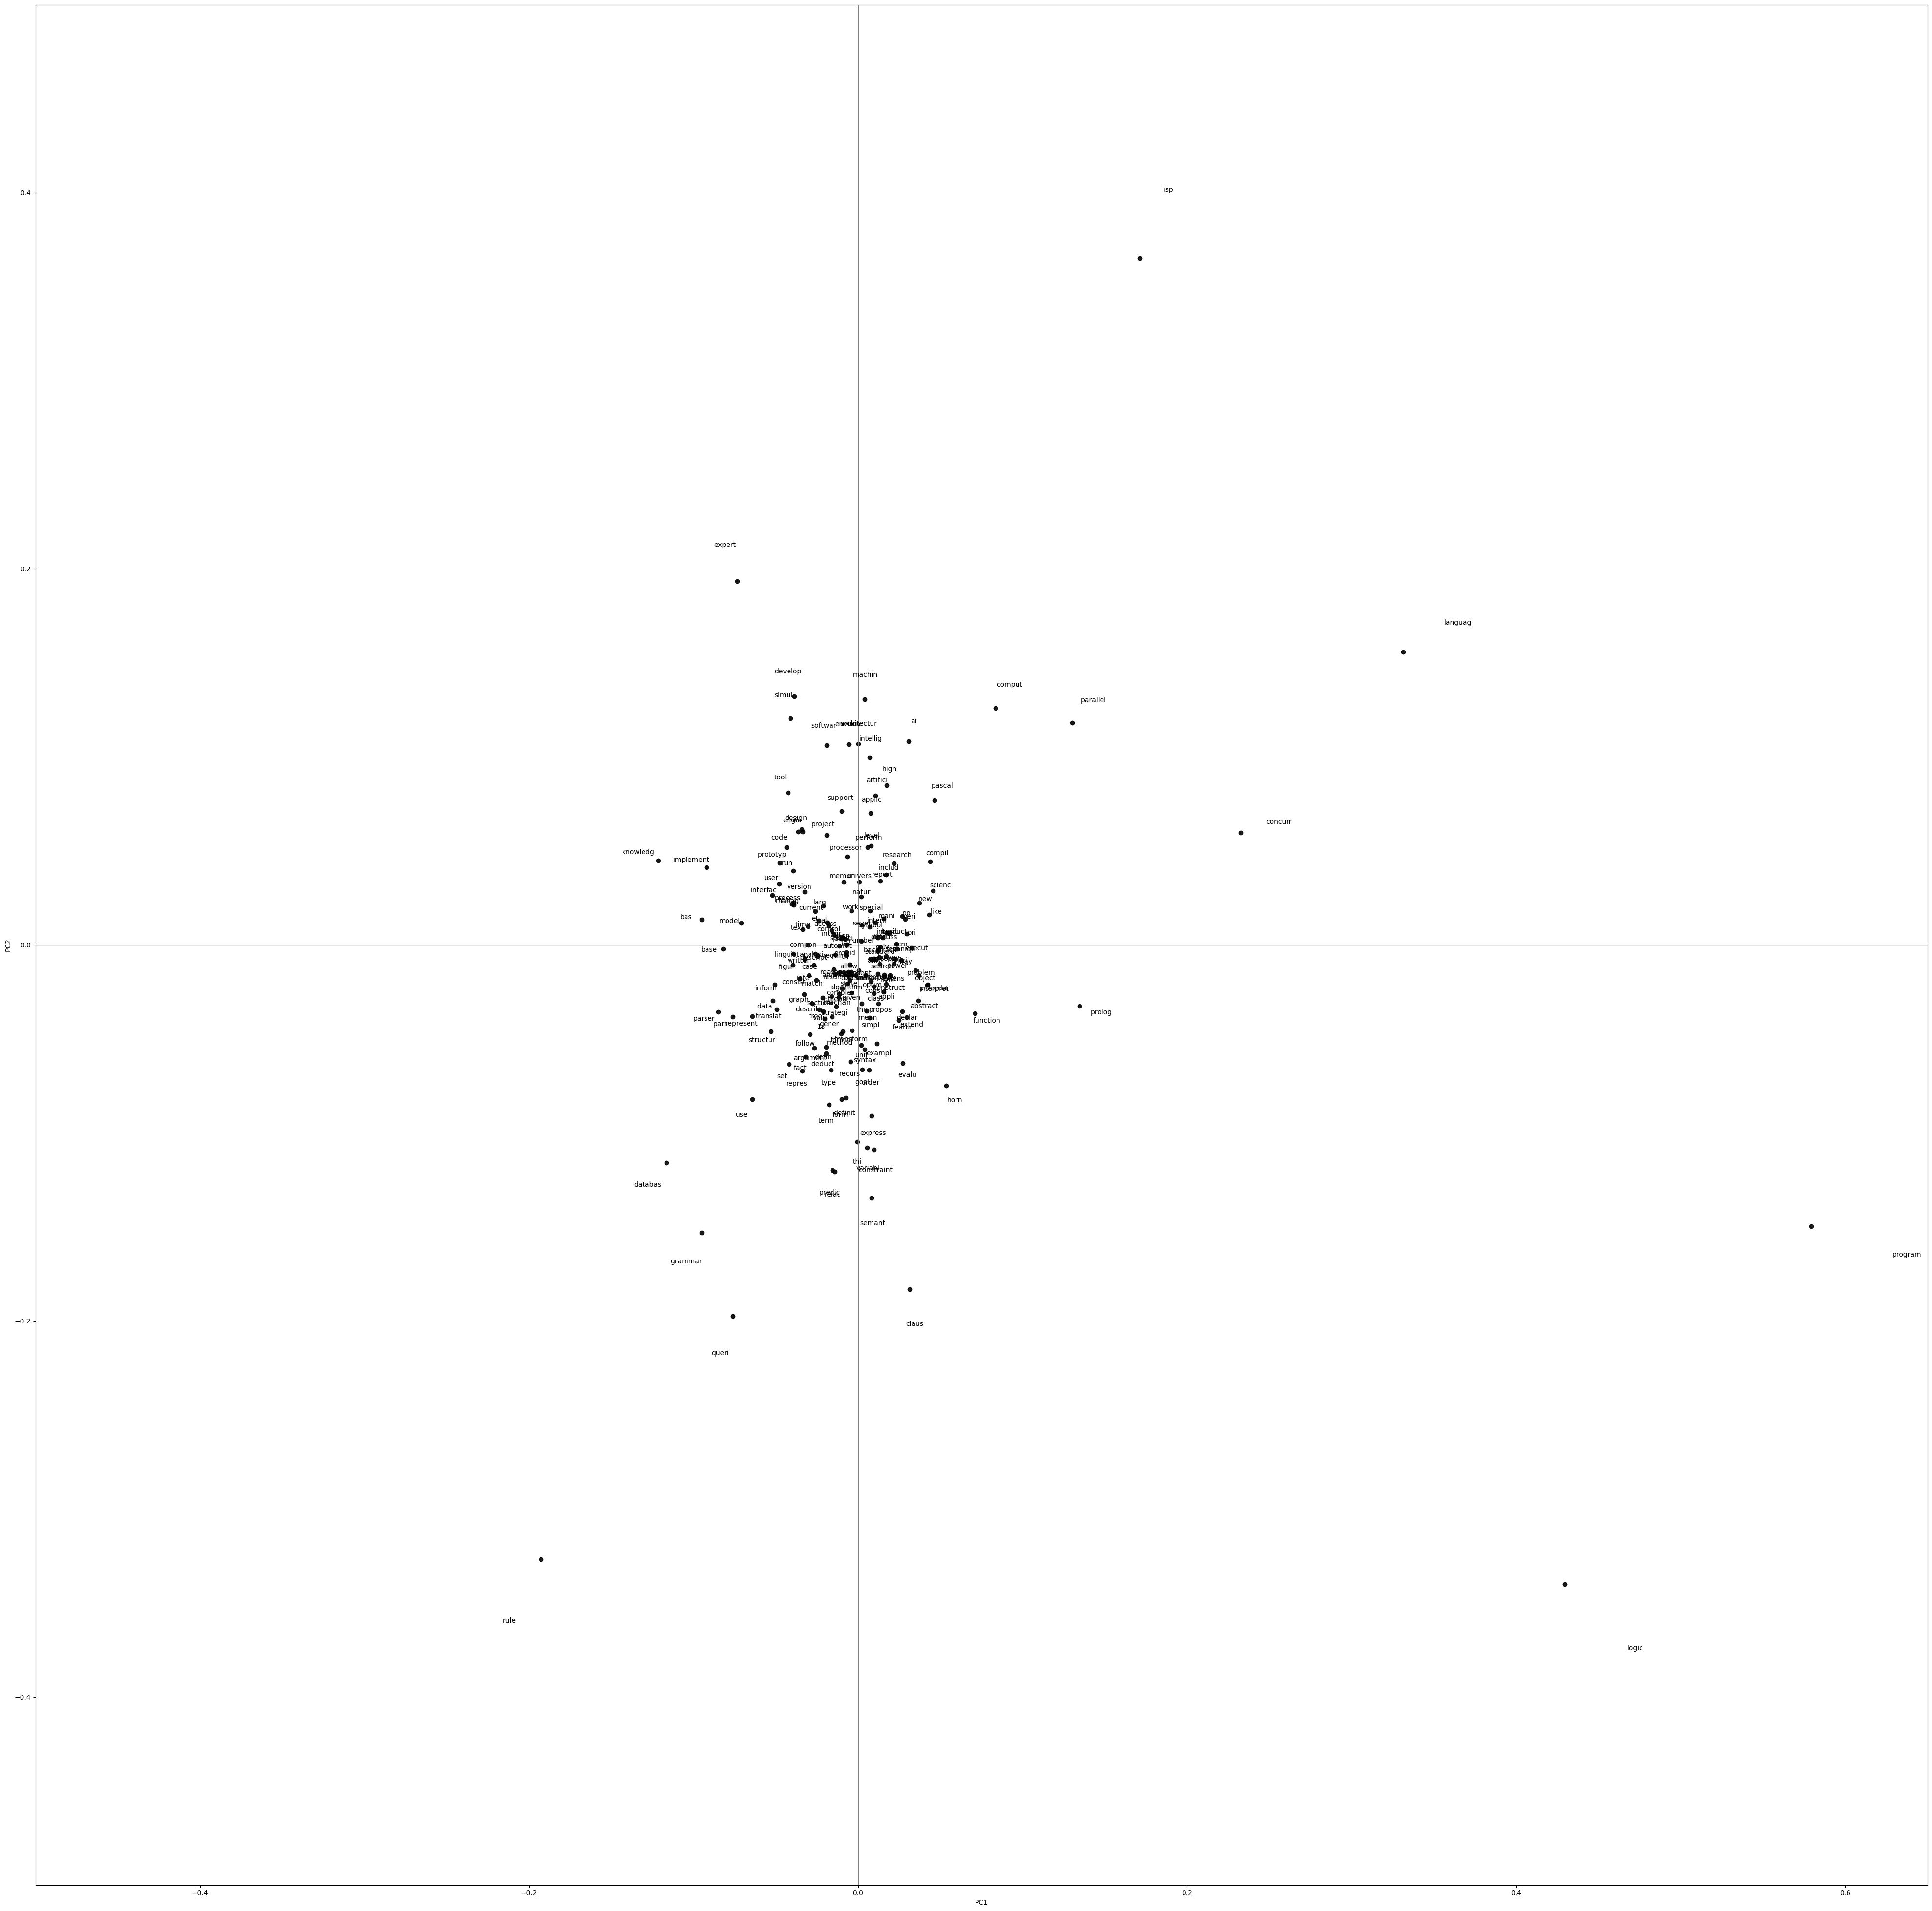

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:


# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:3, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(50, 50))

# Placer les vecteurs des variables avec des points associés
for i in range(n):
    # Position des points
    x = coeff[i, 0]
    y = coeff[i, 1]

    # Ajouter un point
    plt.scatter(x, y, color='k', alpha=0.9)

    # Ajouter le label
    plt.text(x * 1.1, y * 1.1, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
# circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
#plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-0.5, 0.65)
plt.ylim(-0.5, 0.5)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Cercle de corrélation ACP données ACM Prolog')

# Save the figure as a PNG file
plt.savefig('ACP_Prolog_tfidf_Axes_0_1.png')

# Afficher la figure
plt.show()

# Download the saved file
files.download('ACP_Prolog_tfidf_Axes_0_1.png')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['North America' 'Europe' 'Oceania' ... 'North America' 'Europe' nan]
['1981-1990' '1981-1990' '1981-1990' ... '1991-1995' '1991-1995'
 '1991-1995']


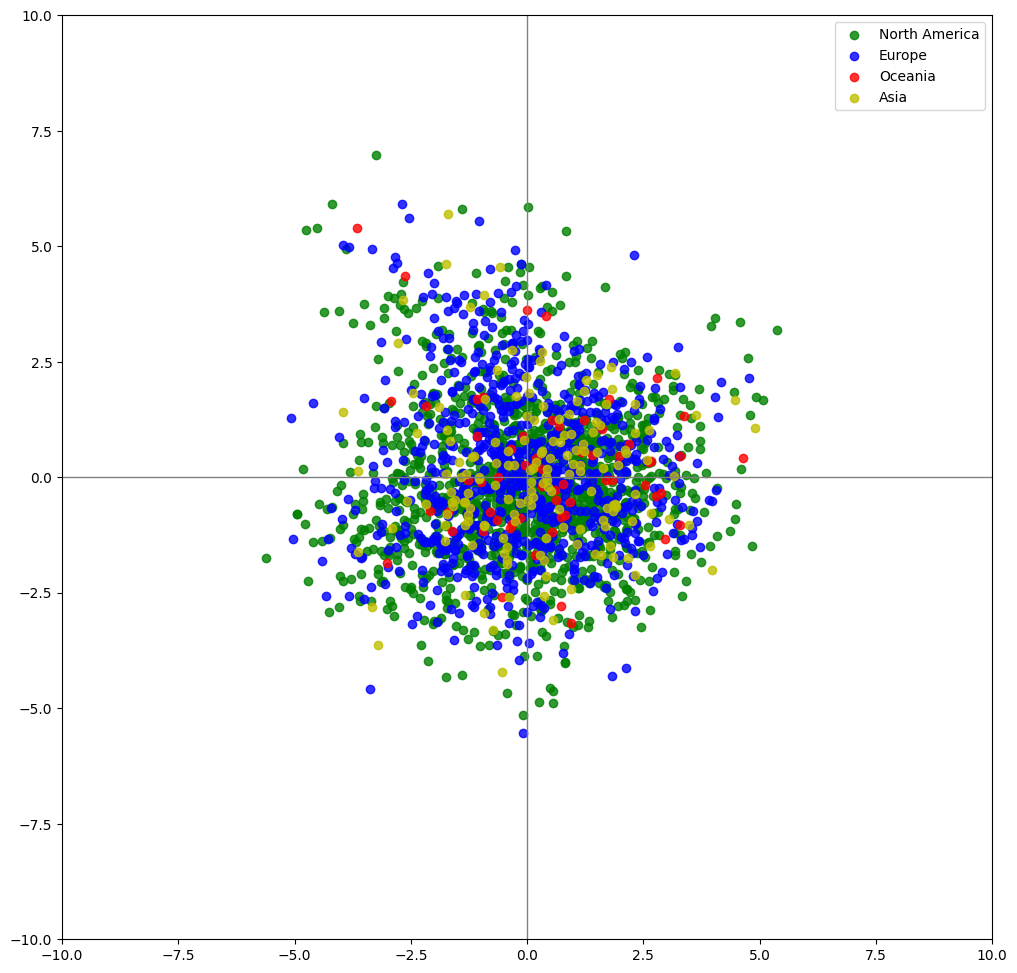

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Charger les données ACM
df=pd.read_csv("tfidf_table_acm.csv", sep= ",")

# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, :-3].values
areas = df.iloc[:, -3].values
periods = df.iloc[:, -1].values
print(X)
print(areas)
print(periods)


# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X_scaled)

# Obtenir les composantes principales
components = pca.components_
n_components = X.shape[1]
feature_names=df.columns[0:300]

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:3, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['g', 'b', 'r', 'y']
area_types = ['North America', 'Europe', 'Oceania', 'Asia']
period_types = ['1981-1990', '1991-1995', '1970-1980']
lw = 1

# Scatter plot data points with different colors based on the "areas" variable
#for color, area in zip(colors, area_types):
    #plt.scatter(X_pca[areas == area, 1], X_pca[areas == area, 2], color=color, alpha=.8, lw=lw, label=str(area))

# Scatter plot data points with different colors based on the "period" variable
for color, area in zip(colors, area_types):
    plt.scatter(X_pca[areas == area, 1], X_pca[areas == area, 2], color=color, alpha=.8, lw=lw, label=str(area))


# Placer les vecteurs des variables avec des points associés
# for i in range(n):
#     # Position des points
#     x = coeff[i, 1]
#     y = coeff[i, 2]

#     # Ajouter un point
#     plt.scatter(x, y, color='k', alpha=0.9)

#     # Ajouter le label
#     plt.text(x * 1.1, y * 1.1, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
#circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
#plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.title('ACP Prolog articles')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()